In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop
from plot_util import plot_history

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './data/dogs-vs-cats-small/train'
VAL_DIR = './data/dogs-vs-cats-small/validation'
TEST_DIR = './data/dogs-vs-cats-small/test'

In [3]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print("Number of trainable weights in model before forzen: {}".format(len(model.trainable_weights)))
conv_base.trainable = False
print("Number of trainable weights in model after forzen: {}".format(len(model.trainable_weights)))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=2e-5), metrics=['acc'])

Number of trainable weights in model before forzen: 30
Number of trainable weights in model after forzen: 4


In [5]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_iter = train_gen.flow_from_directory(TRAIN_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_iter = val_gen.flow_from_directory(VAL_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history_feature_extraction = model.fit_generator(
    train_iter, steps_per_epoch=100, epochs=30, 
    validation_data=val_iter, validation_steps=50,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 21s - loss: 2.0186 - acc: 0.7535 - val_loss: 0.7319 - val_acc: 0.9110
Epoch 2/30
 - 17s - loss: 0.9909 - acc: 0.8690 - val_loss: 0.5062 - val_acc: 0.9370
Epoch 3/30
 - 17s - loss: 0.7127 - acc: 0.8960 - val_loss: 0.4581 - val_acc: 0.9470
Epoch 4/30
 - 18s - loss: 0.6565 - acc: 0.9105 - val_loss: 0.3789 - val_acc: 0.9530
Epoch 5/30
 - 17s - loss: 0.5571 - acc: 0.9180 - val_loss: 0.3359 - val_acc: 0.9610
Epoch 6/30
 - 17s - loss: 0.6001 - acc: 0.9235 - val_loss: 0.3255 - val_acc: 0.9600
Epoch 7/30
 - 17s - loss: 0.6073 - acc: 0.9225 - val_loss: 0.3423 - val_acc: 0.9580
Epoch 8/30
 - 17s - loss: 0.4227 - acc: 0.9390 - val_loss: 0.3354 - val_acc: 0.9590
Epoch 9/30
 - 17s - loss: 0.5152 - acc: 0.9285 - val_loss: 0.3103 - val_acc: 0.9620
Epoch 10/30
 - 17s - loss: 0.4215 - acc: 0.9405 - val_loss: 0.2895 - val_acc: 0.9710
Epoch 11/30
 - 16s - loss: 0.4158 - acc: 0.9395 - val_loss: 0.3098 - val_acc: 0.9680
Epoch 12/30
 - 17s - loss:

In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [8]:
conv_base.trainable = True
print("Number of trainable weights in conv_base before forzen: {}".format(len(conv_base.trainable_weights)))

trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    layer.trainable = trainable

print("Number of trainable weights in conv_base after forzen: {}".format(len(conv_base.trainable_weights)))

Number of trainable weights in conv_base before forzen: 26
Number of trainable weights in conv_base after forzen: 6


In [0]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-5), metrics=['acc'])

In [10]:
history_fine_tuning = model.fit_generator(
    train_iter, steps_per_epoch=100, epochs=30, 
    validation_data=val_iter, validation_steps=50,
    verbose=2
)

Epoch 1/30
 - 19s - loss: 0.2783 - acc: 0.9600 - val_loss: 0.2475 - val_acc: 0.9710
Epoch 2/30
 - 19s - loss: 0.2612 - acc: 0.9600 - val_loss: 0.2520 - val_acc: 0.9710
Epoch 3/30
 - 17s - loss: 0.2039 - acc: 0.9640 - val_loss: 0.2619 - val_acc: 0.9720
Epoch 4/30
 - 17s - loss: 0.1543 - acc: 0.9700 - val_loss: 0.2598 - val_acc: 0.9670
Epoch 5/30
 - 17s - loss: 0.1815 - acc: 0.9670 - val_loss: 0.2899 - val_acc: 0.9690
Epoch 6/30
 - 17s - loss: 0.1409 - acc: 0.9700 - val_loss: 0.3132 - val_acc: 0.9670
Epoch 7/30
 - 18s - loss: 0.1402 - acc: 0.9705 - val_loss: 0.2434 - val_acc: 0.9710
Epoch 8/30
 - 17s - loss: 0.1506 - acc: 0.9710 - val_loss: 0.2862 - val_acc: 0.9700
Epoch 9/30
 - 17s - loss: 0.1464 - acc: 0.9720 - val_loss: 0.2677 - val_acc: 0.9670
Epoch 10/30
 - 17s - loss: 0.1254 - acc: 0.9735 - val_loss: 0.2381 - val_acc: 0.9670
Epoch 11/30
 - 19s - loss: 0.1048 - acc: 0.9770 - val_loss: 0.1797 - val_acc: 0.9720
Epoch 12/30
 - 17s - loss: 0.0876 - acc: 0.9760 - val_loss: 0.2733 - val_a

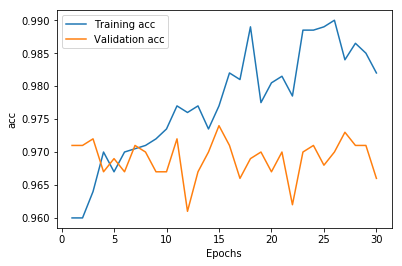

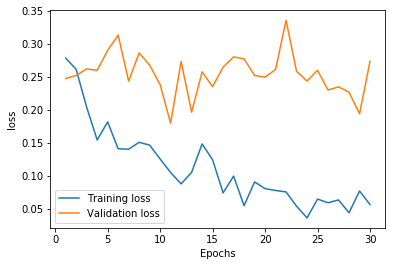

In [12]:
plot_history(history_fine_tuning, metrics=('acc', 'loss'))

In [13]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_iter = test_gen.flow_from_directory(TEST_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_iter, steps=50)
print("test_loss = {}, test_acc = {}".format(test_loss, test_acc))

Found 1000 images belonging to 2 classes.
test_loss = 0.2668267612508174, test_acc = 0.9659999942779541


In [0]:
model.save('7_pre_trained_fine_tuning.h5')